# Exercise 1 - TMA4130 - Mathematics 4N

In this exercise you are supposed to write python code as instructed. All problems are explained in the markdown cells, and for each problem there is a code cell below where you solve the problems.
So you complete your answers in a copy of THIS notebook and upload the ipynb-file through the ovsys system when you are done.

All answers should be given in the code cells, and you can document what you do in inline comments (prefixed by # as usual in Python code).

### Problem 1 (Linear algebra)

#### (a) 
Define the ndarray's V and W that contain the vectors

$$
V = [1, -1, 2, 2],\quad W = [2,0,1,-1]
$$

using the function np.array.

#### (b)
Have Python compute $V+W$, $V-W$, $V^T W$

#### (c)
Define the matrix below as a ndarray by using np.array
$$
   A=\left[ \begin{array}{rrrr} 1 & -1 & 0 & 1\\ 2 & 0 & -1 & 1 \\ 1&1&1&1\\ -1 &2 &1 &1\end{array}\right] 
$$

#### (d)
Find the rank of $A$ by using np.linalg.matrix_rank, and if possible, solve the system $A x = V$ with respect to $x$ where $V$ is as defined in (a).

#### (e)
Compute the eigenvalues of the matrix $A$ by np.linalg.eig


In [9]:
import numpy as np
# Complete Problem 1 here
V = np.array([1,-1,2,2])
W = np.array([2,0,1,-1])

print("V + W = ", np.add(V,W))
print("V - W = ", np.subtract(V,W))
print("VT * W = ", np.dot(V.T,W))

A = np.array([[1,-1,0,1],[2,0,-1,1],[1,1,1,1],[-1,2,1,1]])
print(np.linalg.matrix_rank(A))
print(np.linalg.solve(A,V))
print(np.linalg.eigvals(A))


V + W =  [ 3 -1  3  1]
V - W =  [-1 -1  1  3]
VT * W =  2
4
[-0.14285714 -0.28571429  1.57142857  0.85714286]
[-0.1945968+1.70058547j -0.1945968-1.70058547j  2.3891936+0.j
  1.       +0.j        ]


### Problem 2 (plot a function)

#### (a)
Let $P$ be a ndarray of distinct (different) values. As an example, generate $P=[0,0.1,0.2,...,0.9,1]$ by using the numpy function np.linspace.

#### (b)
Let us assume that the ndarray $P$ in (a) has 3 elements always with distinct values.
We define the function

$$
     L_1(x) = \frac{(x-P[0])(x-P[2])}{(P[1]-P[0])(P[1]-P[2])}
$$

Make a function L1(x,P) which computes this. Make it so that if x isn't **one** number, but in itself a ndarray with $m+1$ values, $x=[x_0, x_1, \ldots,x_m]$, the function will return a ndarray consisting of
$[L_1(x_0), L_1(x_1),\ldots,L_1(x_m)]$. Hint: Don't use for-loops.
Test the function with $P=[1,2,3]$ and find the value of $L_1(x)$ for 50 values of $x$ between 0.5 and 3.5.

#### (c)
Import the module matplotlib.pyplot and plot $L_1(x)$ vs $x$ on the interval $x\in [0.5, 3.5]$

#### (d)
Repeat (b) and (c) for the functions

$$
 L_0(x) = \frac{(x-P[1])(x-P[2])}{(P[0]-P[1])(P[0]-P[2])}\qquad\text{and}\qquad
  L_2(x) = \frac{(x-P[0])(x-P[1])}{(P[2]-P[0])(P[2]-P[1])}
$$



[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


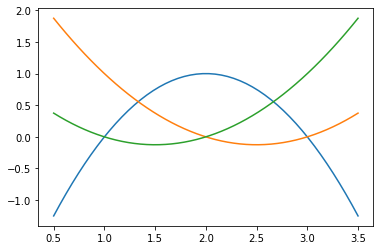

In [19]:
import matplotlib.pyplot as plt
# Complete problem 2 hereprint(P)
P = np.linspace(0, 1, 11)
print(P)

def L1(x,P):
    return ((x-P[0])*(x-P[2]))/((P[1]-P[0])*(P[1]-P[2]))
def L0(x,P):
    return ((x-P[1])*(x-P[2]))/((P[0]-P[1])*(P[0]-P[2]))
def L2(x,P):
    return ((x-P[0])*(x-P[1]))/((P[2]-P[0])*(P[2]-P[1]))

x = np.linspace(0.5, 3.5, 50)
P = np.array([1, 2, 3])

L1 = (L1(x,P))
L0 = (L0(x,P))
L2 = (L2(x,P))

plt.plot(x, L1)
plt.plot(x, L0)
plt.plot(x, L2)


### Problem 3  - 4N only

The function below extends the function implemented in Problem 2 above to a general amount of points. The function takes in input a 1D-array of points $x=x_0,\ldots,x_m$ that serves for visualization purposes (as above) and compute functions $L_i(x)$ (different from the above ones) for every point $P_i$ in the 1D-array of points $P=P_0,\ldots,P_n$. The function outputs a 2D-array `results` of size `nxm` where `results[i,j]`$=L_i(x_j)$. The code compiles without errors, but there are two errors in the code that you have to spot. This time the for loops are made explicit for didactic purposes. Hint: for three points you should recover the results above. It can be useful to plot the various $L_i(x)$ as done in Problem 2.  

In [6]:
def L(xx,P):

    results = np.ones((P.size, xx.size))

    for i in range(results.shape[0]):
        for j in range(results.shape[0]):
            for k in range(results.shape[0]):
                if k!=i:
                    results[i,j] *= (xx[j] - P[i])/(P[i]-P[k])
    
    return results